<a href="https://colab.research.google.com/github/iEpsilon-FPS/QU-MLinF/blob/master/4.7%20ML_in_Finance_Module_4_Case_study_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering

## Install required packages

In [ ]:
install.packages('dplyr')
install.packages('cluster')
install.packages('Rtsne')
install.packages('ggplot2')
install.packages('RCurl')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘bitops’




## R Packages  imported to assist in the analysis

Below are the set of libraries imported into this python notebook that is useful in doing exploratory and predictive data analysis.

In [ ]:
#  Module: Clustering Case Study 
#  Version 1.1
#  Topic : Clustering
#  Example source: https://www.kaggle.com/wendykan/lending-club-loan-data
#####################################################################
#  For support or questions, contact Sri Krishnamurthy at
#  sri@quantuniversity.com
#  Copyright 2016 QuantUniversity LLC.
#####################################################################

### R packages
## Data wrangling
# install.packages("dplry")
library(dplyr)

## Clustering
# install.packages("cluster")
library(cluster) # for gower similarity and pam

## Visualization 
# install.packages("Rtsne")
# install.packages("ggplot2")
library(Rtsne) # for t-SNE plot with dimension reduction 
library(ggplot2) # for visualization
# download data
library(RCurl)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




## Step 1 Reading data

In [ ]:
### Step 1 Reading data
url <- getURL("https://qusandbox-dataset.s3-us-west-2.amazonaws.com/LendingClubLoan.csv")
LendingClubLoan <- read.csv(textConnection(url))
LendingClubLoan_Clustering <- dplyr::select(LendingClubLoan, -loan_status_Binary)

# Randomly select 5000 rows
set.seed(33)
LendingClubLoan_Clustering <- LendingClubLoan_Clustering[sample(1:nrow(LendingClubLoan_Clustering),
                                                                5000, replace=FALSE), ]
str(LendingClubLoan_Clustering)

'data.frame':	5000 obs. of  16 variables:
 $ loan_amnt          : int  12000 22000 25000 5700 35000 16000 6500 5000 10000 2000 ...
 $ term               : Factor w/ 2 levels " 36 months"," 60 months": 1 2 1 2 2 2 1 1 1 1 ...
 $ int_rate           : num  5.99 12.69 11.71 18.64 19.03 ...
 $ installment        : num  365 497 827 147 587 ...
 $ grade              : Factor w/ 7 levels "A","B","C","D",..: 1 2 2 5 5 5 2 3 1 2 ...
 $ sub_grade          : Factor w/ 35 levels "A1","A2","A3",..: 2 10 8 21 22 21 7 13 3 8 ...
 $ emp_length         : Factor w/ 12 levels "< 1 year","1 year",..: 5 2 3 3 3 3 1 5 1 3 ...
 $ home_ownership     : Factor w/ 3 levels "MORTGAGE","OWN",..: 1 1 3 1 1 1 3 3 3 2 ...
 $ annual_inc         : num  36000 115000 70000 107004 99225 ...
 $ verification_status: Factor w/ 3 levels "Not Verified",..: 2 3 3 2 3 3 2 2 2 1 ...
 $ issue_d            : Factor w/ 5 levels "11-Aug","11-Dec",..: 1 4 2 4 2 5 2 4 2 4 ...
 $ purpose            : Factor w/ 13 levels "car","credit_car

## Step 2 Calculating distance
Use Gower's distance to measure the distance between two entity. The attribute of entity may contain combinations of logical, numerical, categorical or text data. The distance is calculated as a number between 0 (identical) and 1 (maximally dissimilar).

In [ ]:
### Step 2 Calculating distance
gower_dist <- daisy(LendingClubLoan_Clustering, metric = "gower")

## Step 2-1 Checking attributes to ensure the correct methods are being used
# (I = interval, N = nominal)
summary(gower_dist)

12497500 dissimilarities, summarized :
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.01194 0.42982 0.49757 0.49368 0.56176 0.85126 
Metric :  mixed ;  Types = I, N, I, I, N, N, N, N, I, N, N, N, N, I, I, I 
Number of objects : 5000

In [ ]:
#which(gower_mat == min(gower_mat[gower_mat != min(gower_mat)]))

### Step 2-2 Outputting most similar pair

In [ ]:
## Step 2-2 Outputting most similar pair
gower_mat <- as.matrix(gower_dist)

LendingClubLoan_Clustering[
  which(gower_mat == min(gower_mat[gower_mat != min(gower_mat)]),
        arr.ind = TRUE)[1, ], ]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths
,<int>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<dbl>,<int>,<int>
1579,10000,36 months,11.71,330.76,B,B3,5 years,RENT,39600,Not Verified,11-Dec,debt_consolidation,CA,10.48,0,0
24,10000,36 months,11.71,330.76,B,B3,5 years,RENT,50000,Not Verified,11-Dec,debt_consolidation,CA,16.01,0,0


### Step 2-3 Outputting most dissimilar pair

In [ ]:
## Step 2-3 Outputting most dissimilar pair
LendingClubLoan_Clustering[
  which(gower_mat == max(gower_mat[gower_mat != max(gower_mat)]),
        arr.ind = TRUE)[1, ], ]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths
,<int>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<dbl>,<int>,<int>
1599,1325,36 months,6.62,40.69,A,A2,10+ years,OWN,39456,Not Verified,11-Dec,other,CA,26.22,0,1
6091,35000,60 months,22.35,973.64,F,F5,1 year,MORTGAGE,340000,Source Verified,11-Oct,credit_card,IL,3.60,4,0


From the output, you can see that the most similar pair have similar loan information, such as loan amount, grade and interest rate, while the most dissimilar pair are very different from each other. By using Gower distance, you can find some relationships in data.

## Step 3 Selecting number of clusters 
One method to select the number of clusters is to compute the mean Silhouette Coefficient of all samples and select the number with best performance.

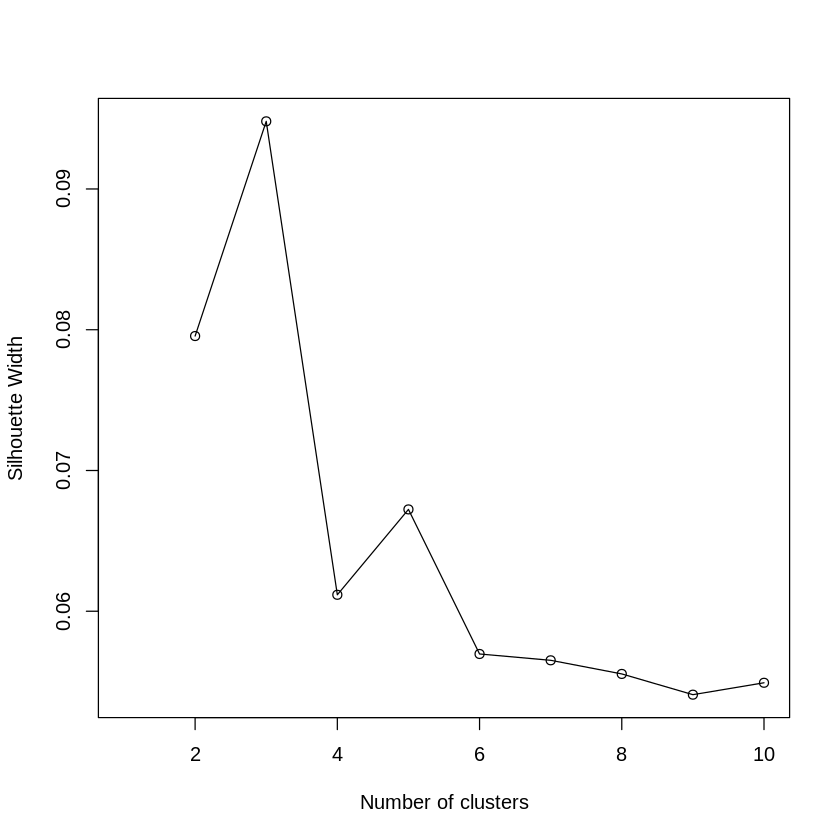

In [ ]:
### Step 3 Selecting number of clusters 
sil_width <- c(NA)

for(i in 2:10){
  pam_fit <- pam(gower_dist,
                 diss = TRUE,
                 k = i)
  
  sil_width[i] <- pam_fit$silinfo$avg.width
}

# Plot sihouette width (higher is better, based on the result, Cluster 3 yields the highest value)
plot(1:10, sil_width,
     xlab = "Number of clusters",
     ylab = "Silhouette Width")
lines(1:10, sil_width)

From the Silhouette Score plotting, the score drops dramatically from 3 to 4 clusters, where you can see the highest score. It seems like 3 is the optimal number of clusters.

## Step 4 Partitioning around medoids (PAM)
The PAM algorithm is very similar to K-means, mostly because both are partitional algorithms, in other words, they break the dataset into groups (= clustering), while also trying to minimize the error.

### Step 4-1 Summary of clustering results

In [ ]:
### Step 4 Partitioning around medoids (PAM) 
## Step 4-1 Summary of clustering results
pam_fit <- pam(gower_dist, diss = TRUE, k = 3)

pam_results <- LendingClubLoan_Clustering %>%
  mutate(cluster = pam_fit$clustering) %>%
  group_by(cluster) %>%
  do(the_summary = summary(.))

pam_results$the_summary

[[1]]
   loan_amnt             term         int_rate       installment      grade   
 Min.   : 1000    36 months:1516   Min.   : 5.420   Min.   :  30.16   A:1173  
 1st Qu.: 5000    60 months: 135   1st Qu.: 6.620   1st Qu.: 156.46   B: 195  
 Median : 8000                     Median : 7.900   Median : 243.49   C: 116  
 Mean   : 9867                     Mean   : 9.234   Mean   : 304.01   D: 116  
 3rd Qu.:12625                     3rd Qu.:10.650   3rd Qu.: 375.81   E:  37  
 Max.   :35000                     Max.   :23.520   Max.   :1269.73   F:  11  
                                                                      G:   3  
   sub_grade       emp_length   home_ownership   annual_inc    
 A4     :314   10+ years:508   MORTGAGE:1059   Min.   :  8000  
 A1     :270   < 1 year :180   OWN     : 133   1st Qu.: 43154  
 A2     :208   2 years  :143   RENT    : 459   Median : 61200  
 A5     :198   3 years  :135                   Mean   : 71354  
 A3     :183   4 years  :120              

### Step 4-2 Center medoid of each cluster

In [ ]:
## Step 4-2 Exemplars of each cluster
LendingClubLoan_Clustering[pam_fit$medoids, ]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths
,<int>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<dbl>,<int>,<int>
7497,8000,36 months,7.51,248.89,A,A3,10+ years,MORTGAGE,51000,Source Verified,11-Sep,debt_consolidation,CA,12.54,0,0
4868,15000,60 months,14.27,351.13,C,C2,10+ years,MORTGAGE,44000,Verified,11-Oct,debt_consolidation,NY,16.50,0,0
24,10000,36 months,11.71,330.76,B,B3,5 years,RENT,50000,Not Verified,11-Dec,debt_consolidation,CA,16.01,0,0


You can see that <b>the loan_amnt, int_rate, and grade</b> have significant difference among the clusters.

### Step 4-3 Visualization with reduced-dimension 

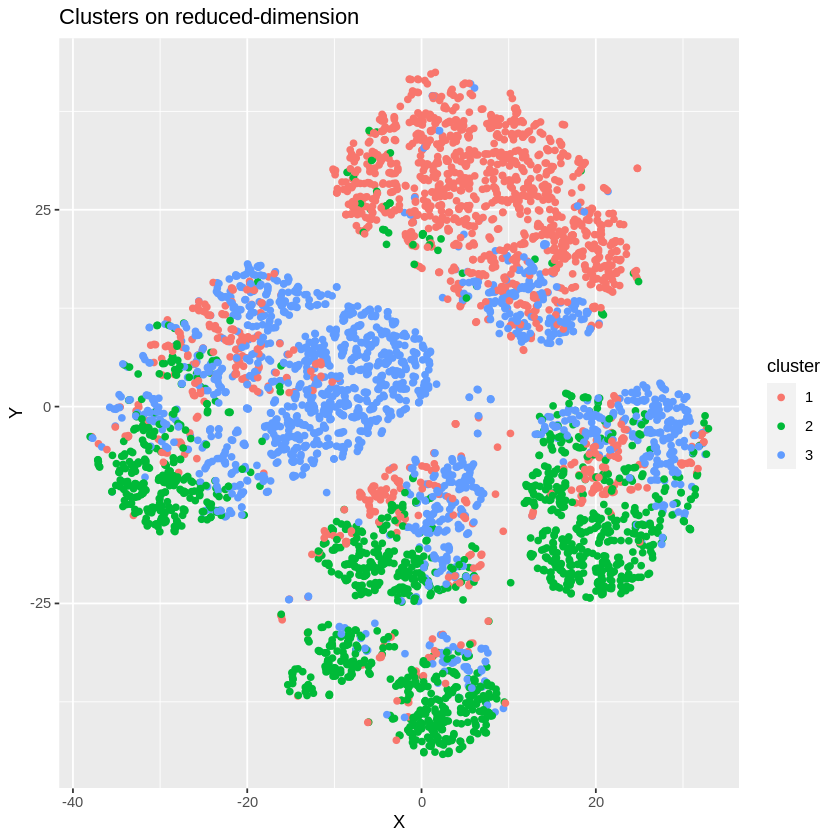

In [ ]:
## Step 4-3 Visualization with reduced-dimension 
tsne_obj <- Rtsne(gower_dist, is_distance = TRUE)

tsne_data <- tsne_obj$Y %>%
  data.frame() %>%
  setNames(c("X", "Y")) %>%
  mutate(cluster = factor(pam_fit$clustering))

ggplot(aes(x = X, y = Y), data = tsne_data) +
  geom_point(aes(color = cluster)) +
  ggtitle("Clusters on reduced-dimension")

### Step 4-4 Plotting clusters over two variables
Try to plot the clusters over several variables, and you will understand how the model separates the clusters.

For example, the variables you can use are "loan_anmt", "grade" and "int_rate". When the "loan_anmt" is picked for the x-axis, while "grade" and "int_rate" are picked for the y-axis, what can we tell from these graphs?

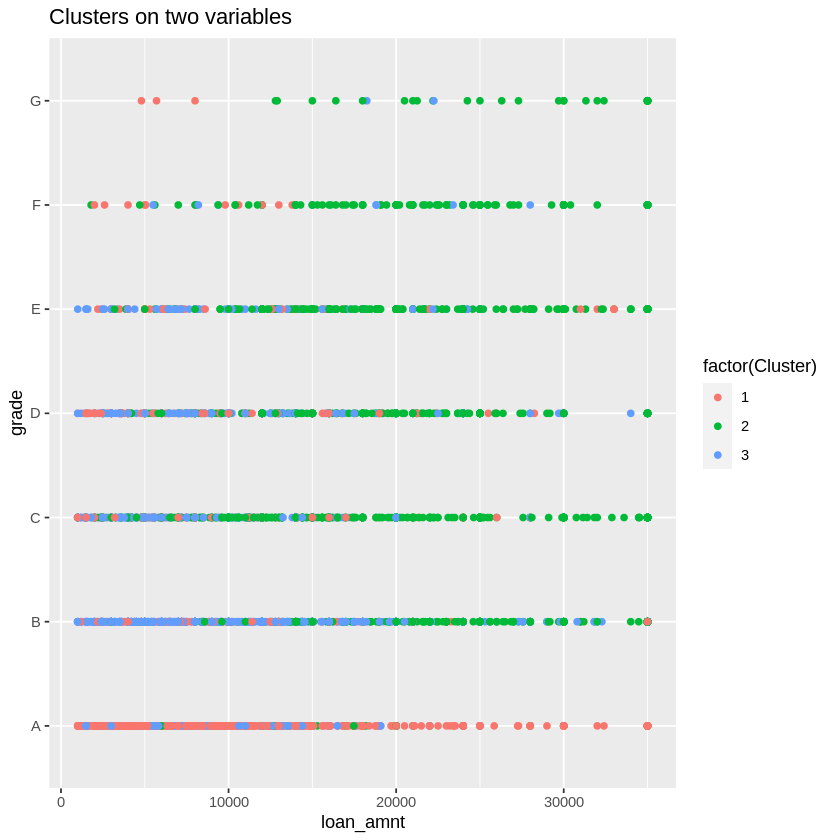

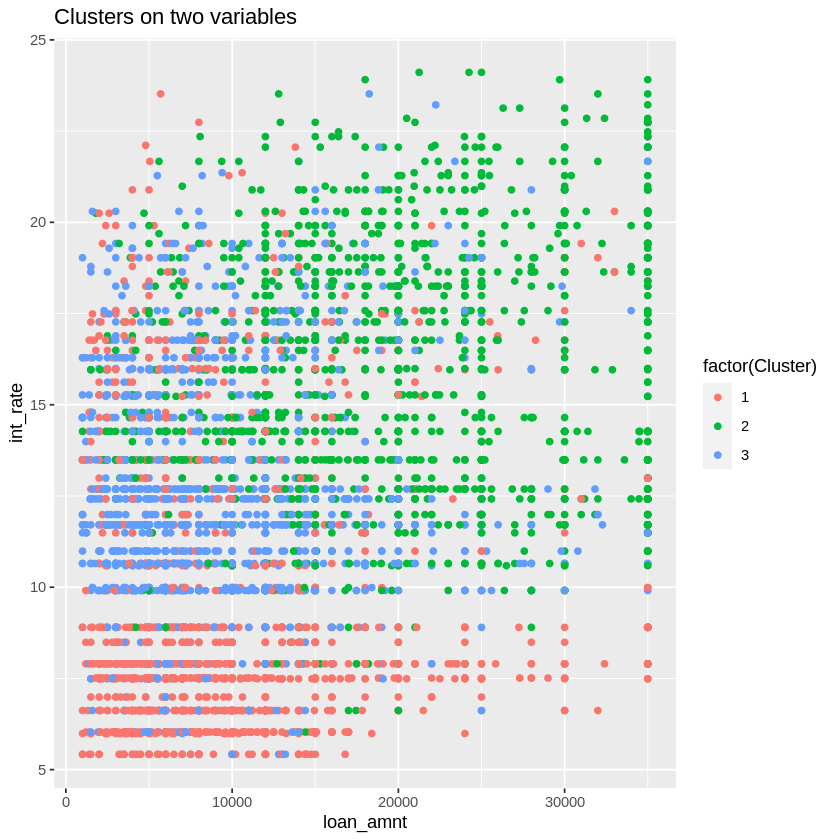

In [ ]:
## Step 4-4 Plotting clusters over two variables
Clustering <- LendingClubLoan_Clustering %>%
  mutate(Cluster = pam_fit$clustering)

ggplot(aes(x = loan_amnt, y = grade), data = Clustering) +
  geom_point(aes(color = factor(Cluster))) +
  ggtitle("Clusters on two variables")

ggplot(aes(x = loan_amnt, y = int_rate), data = Clustering) + 
  geom_point(aes(color = factor(Cluster))) +
  ggtitle("Clusters on two variables")

## Step 5 Agglomerative hierarchical clustering

### Step 5-1 Computes agglomerative hierarchical clustering
Compute the hierarchical clustering using "manhattan" metrics.

In [ ]:
### Step 5 Agglomerative hierarchical clustering
## Step 5-1 Computes agglomerative hierarchical clustering
agn1 <- agnes(gower_dist, metric = "manhattan", stand = FALSE)

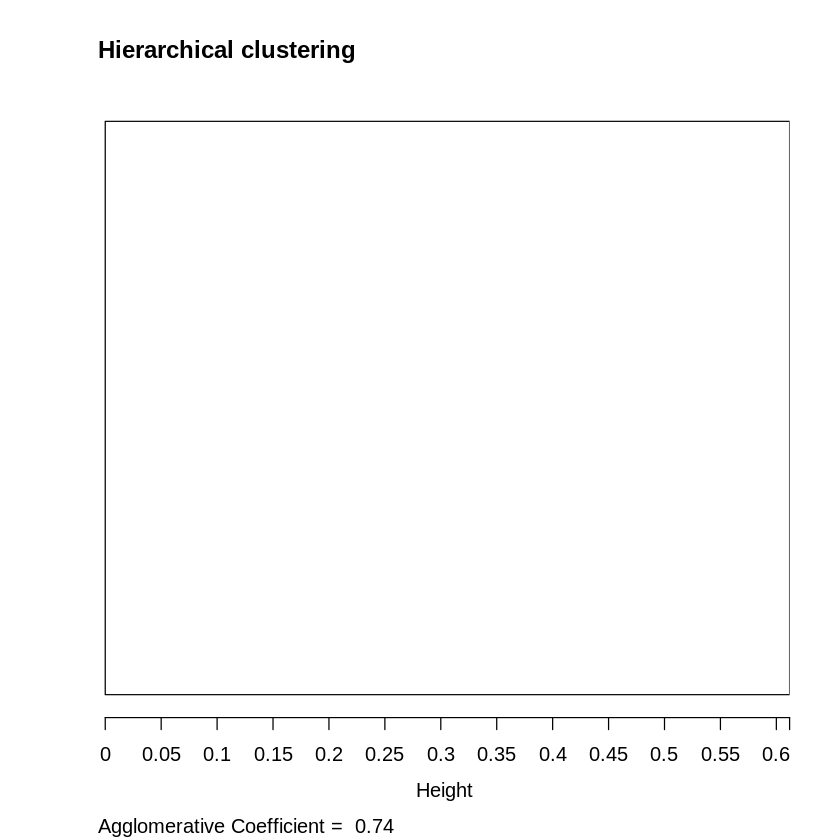

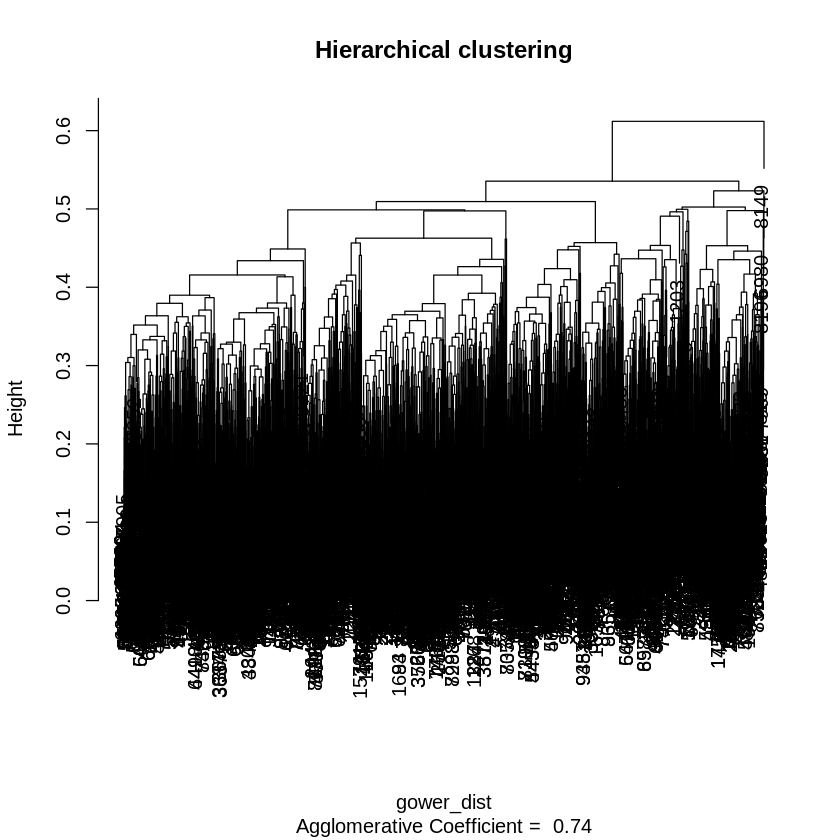

In [ ]:
plot(agn1, main= "Hierarchical clustering")

From the dendrograms, find 6 clusters, where you see large subsets relatively.

### Step 5-2 Visualization on reduced-dimension 

In [ ]:
## Step 5-2 Visualization on reduced-dimension 
HierarchicalCluster <- LendingClubLoan_Clustering %>%
  mutate(Cluster=cutree(agn1,6))

tsne_obj <- Rtsne(gower_dist, is_distance = TRUE)


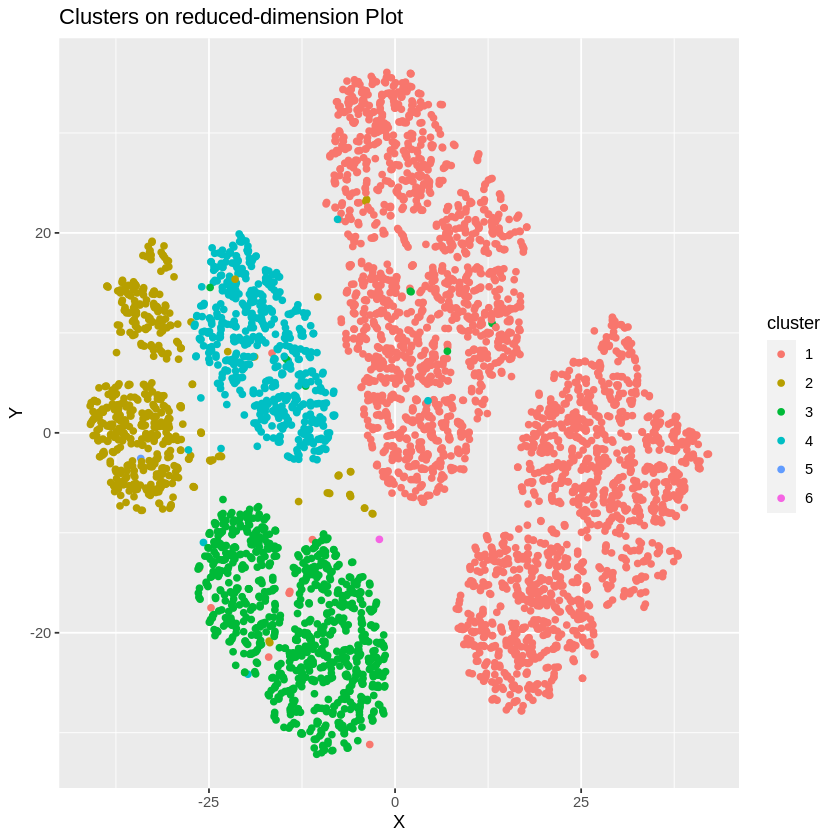

In [ ]:
tsne_data <- tsne_obj$Y %>%
  data.frame() %>%
  setNames(c("X", "Y")) %>%
  mutate(cluster = factor(cutree(agn1,6)))

ggplot(aes(x = X, y = Y), data = tsne_data) +
  geom_point(aes(color = cluster)) +
  ggtitle("Clusters on reduced-dimension Plot")

This model creates 6 clusters, 4 of which are large clusters in the plot. It seems like the other 2 clusters are just outliers compared with the large clusters. The data is clustered better than PAM clustering as clearer boundaries are shown between clusters when hierarchical clustering method is used.

### Step 5-3 Visualization on two variables

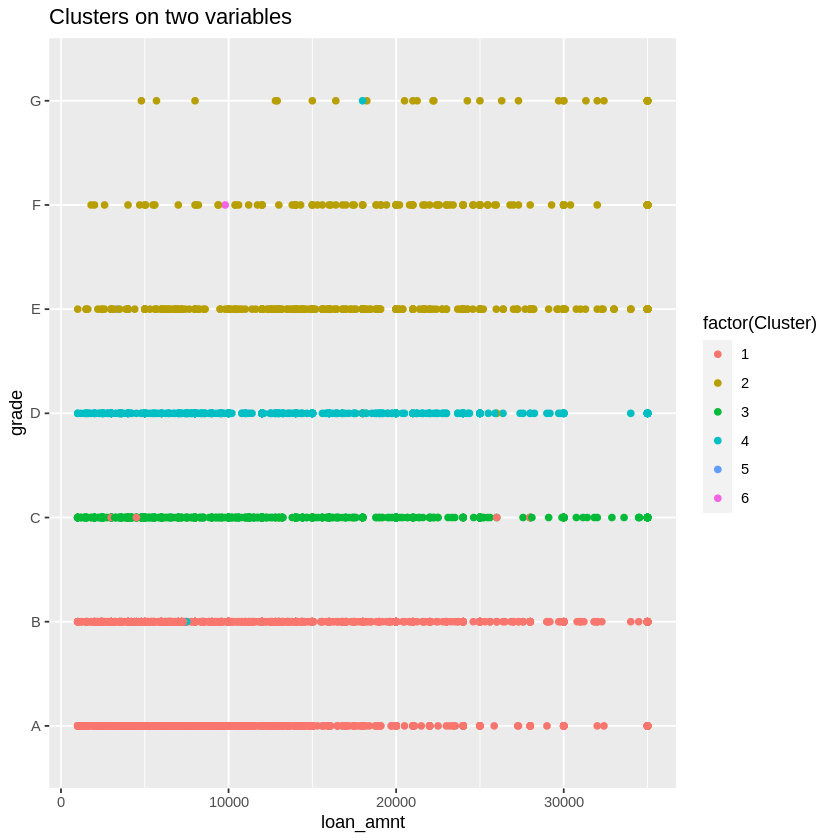

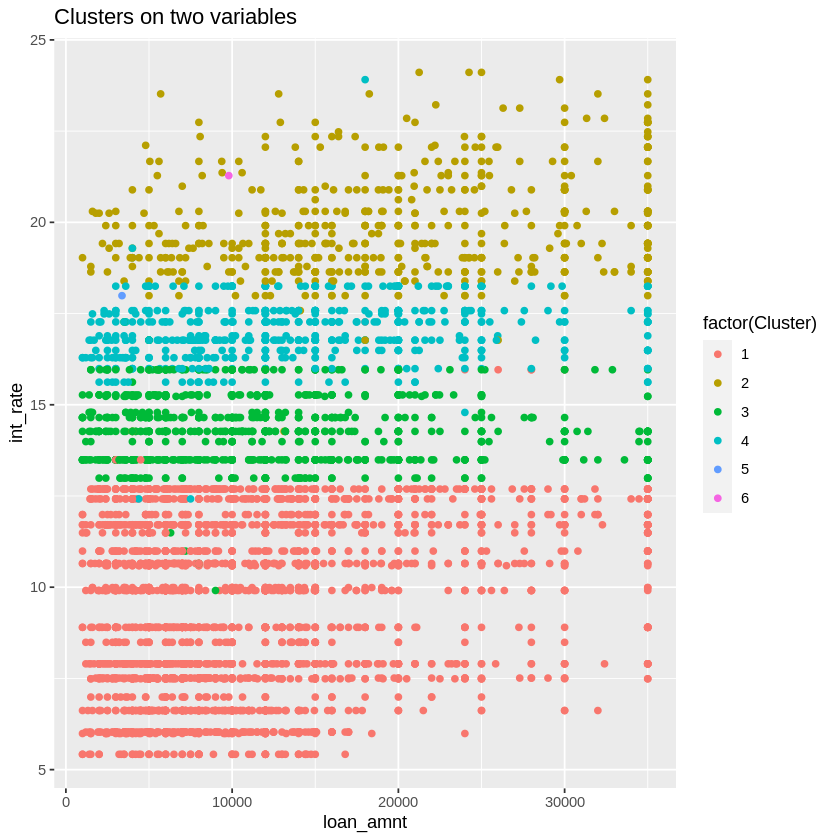

In [ ]:
## Step 5-3 Visualization on two variables
ggplot(aes(x = loan_amnt, y = grade), data = HierarchicalCluster) +
  geom_point(aes(color = factor(Cluster))) +
  ggtitle("Clusters on two variables")

ggplot(aes(x = loan_amnt, y = int_rate), data = HierarchicalCluster) + 
  geom_point(aes(color = factor(Cluster))) +
  ggtitle("Clusters on two variables")

The biggest cluster (pink) ranges in the lowest interest rate (about 5%-12.5%) and grades A and B. Most customers in the cluster have a smaller loan amount than those in other clusters. However, the smallest cluster (goldish-color) has the highest interest rate (about 18%-25%), classified as the grade E, F, G, and the customers in the cluster tend to have a larger amount of loan.